### mm. yea. explore that data.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
#steam data set
data = pd.read_csv("Data\games-features.csv")

In [8]:
data.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


In [7]:
data.tail()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
13352,567660,567660,Baseball Riot,Baseball Riot,Jan 17 2017,0,0,1,0,0,...,Copyright (c) 2016 10tons Ltd.,,English**languages with full audio support,http://www.10tons.com/Game/baseball_riot.html,Minimum:OS: Windows XP / Vista / 7 / 8 / 10Pro...,,,,,
13353,567860,567860,Passage 4,Passage 4,Dec 13 2016,0,0,1,0,0,...,2016 copyright by netmin e.K.,,English* French Italian German* Spanish Dutch*...,http://www.libredia.com,Minimum:OS: Windows 2000/XP/Vista/7/8/10Proces...,,,,,
13354,567940,567940,Piximalism,Piximalism,Sep 26 2019,0,0,1,0,0,...,,,English,None,Minimum:OS: Microsoft(r) Windows(r) XP / Vista...,Recommended:OS: Microsoft(r) Windows(r) XP / V...,,,,
13355,568150,568150,Technoball,Technoball,Dec 12 2016,0,0,1,0,0,...,,,English**languages with full audio support,None,Minimum:OS: Windows 7 (64-bit)Processor: 2.5 G...,,,,,
13356,559250,559250,Ghostlight Manor,Ghostlight Manor,Dec 12 2016,0,0,1,0,0,...,,The real draw here is the gameplay Digital Fut...,English**languages with full audio support,http://digitalfuturelab.com/ghostlight/,Minimum:OS: Windows 7 64 bitProcessor: Intel C...,,,,Minimum:OS: Mac OSX 10.10+ 64 bitProcessor: In...,


In [9]:
#exclude dupicate games
data = data.drop_duplicates() 
#keep games only
data = data[data.GenreIsNonGame == False]
#remove duplicates
data = data.drop_duplicates(subset ="ResponseName", 
                     keep = 'first',) 

In [10]:
import re
from collections import OrderedDict
#pattern used for detecting year
pattern = re.compile("\d{4}$")

def year_distrib( gamelist):
    year_distrib = {}
    for index, row in gamelist.iterrows():
        match = pattern.search(row['ReleaseDate'])
        if match:
            year = int(match.group(0))
            if year not in year_distrib:
                year_distrib[year]=0
            year_distrib[year] = year_distrib[year]+1    
    return year_distrib

#divide game by payment type
free_games = data[data.IsFree == True]
paid_games = data[data.PurchaseAvail == True]
sub_games = data[data.SubscriptionAvail == True]

free = year_distrib(free_games)
paid = year_distrib(paid_games)
sub = year_distrib(sub_games)

print("free Games by year:  " + str(sorted(free.items())))
print("total number of free games: "+ str( sum(free.values())))
print()
print("Paid Games:  " + str(sorted(paid.items())))
print("total number of paid games: "+ str( sum(paid.values())))
print()
print("Subscription Games:  " + str(sorted(sub.items())))

free Games by year:  [(2001, 2), (2003, 1), (2004, 1), (2005, 2), (2006, 4), (2007, 5), (2008, 7), (2009, 9), (2010, 5), (2011, 17), (2012, 33), (2013, 39), (2014, 97), (2015, 212), (2016, 510), (2017, 9)]
total number of free games: 953

Paid Games:  [(1997, 1), (1998, 1), (1999, 2), (2000, 2), (2001, 4), (2003, 3), (2004, 6), (2005, 5), (2006, 63), (2007, 105), (2008, 171), (2009, 331), (2010, 294), (2011, 275), (2012, 355), (2013, 483), (2014, 1590), (2015, 2685), (2016, 4006), (2017, 5)]
total number of paid games: 10387

Subscription Games:  [(2010, 1), (2015, 3), (2016, 7)]


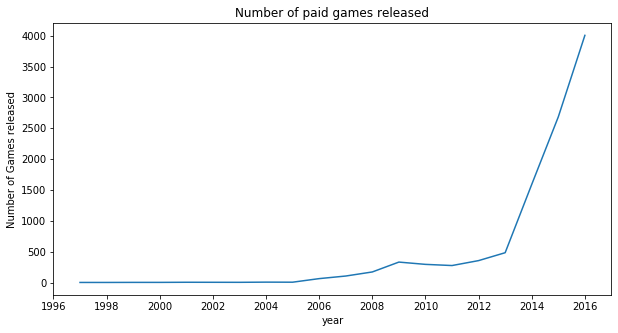

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import seaborn as sns

paid_dist = sorted(paid.items())
plt.figure(figsize=(10,5))
plt.xlim(1996,2017)
plt.xticks(np.arange(1996, 2017, step=2))
plt.plot([i[0]for i in paid_dist][:-1], [i[1]for i in paid_dist][:-1])
plt.title("Number of paid games released")
plt.xlabel("year")
plt.ylabel("Number of Games released")
plt.savefig('num_of_paid_games_per_year.png')
plt.show()

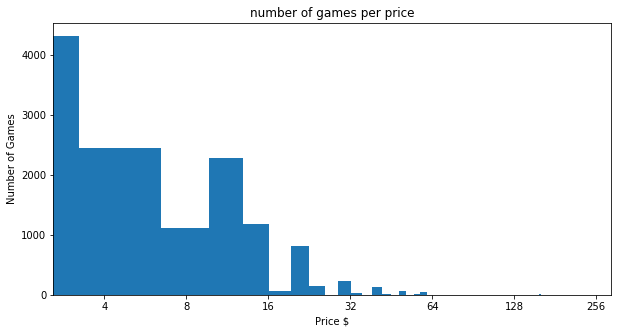

In [12]:
#price distrib

#make a dic for price and count of games
def price_distrib( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price not in price_distrib:
            price_distrib[price]=0
        price_distrib[price] = price_distrib[price]+1    
    return price_distrib


prices = price_distrib(data)
prices = sorted(prices.items())
price = [i[0]for i in prices]
count = [i[1] for i in prices]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

#plt.plot(price, count)
plt.hist(price,weights=count, bins = len(price))
plt.xscale("log")
plt.title("number of games per price")
plt.xlabel("Price $")
plt.ylabel("Number of Games")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.savefig('game_price_hist.png')
plt.show()

In [13]:
# avegrage game price
avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)
print("total price: "+ str(avg_price))
print("total games: "+ str(total))
print("average price per game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median game price: "+ str(np.median(list_prices))+" $")

total price: 107669.63000000003
total games: 12881
average price per game: 8.358794348264889 $
median game price: 5.99 $


In [14]:
# excluding free games
def price_distrib_paid( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price != 0.0:
            if price not in price_distrib:
                price_distrib[price]=0
            price_distrib[price] = price_distrib[price]+1    
    return price_distrib

prices_paid_games = sorted(price_distrib_paid(paid_games).items())
price_paid = [i[0]for i in prices_paid_games]
count_paid = [i[1] for i in prices_paid_games]

avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price_paid):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)

print("total price: "+ str(avg_price))
print("total paid games: "+ str(total))
print("average price per paid game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median paid game price: "+ str(np.median(list_prices))+" $")

total price: 113015.69000000006
total paid games: 12880
average price per paid game: 8.774510093167706 $
median paid game price: 6.49 $


{0.0: 262987, 0.5: 21343, 0.9: 1077, 0.99: 44363, 1.0: 0, 1.2: 10044, 1.49: 7712, 1.5: 897, 1.87: 60441, 1.95: 0, 1.98: 4842, 1.99: 27141, 2.0: 5022, 2.49: 230703, 2.89: 1614, 2.99: 33704, 3.0: 13631, 3.49: 187241, 3.99: 29667, 4.49: 26364, 4.99: 85751, 5.0: 0, 5.65: 3946, 5.75: 717, 5.99: 51018, 6.49: 109942, 6.99: 60222, 7.49: 195760, 7.99: 85591, 8.98: 22598, 8.99: 56554, 9.69: 23495, 9.99: 159890, 10.0: 12016, 10.99: 10555, 11.99: 40408, 12.0: 3946, 12.89: 264182, 12.99: 65189, 13.37: 224366, 13.99: 28724, 14.95: 482988, 14.99: 220575, 15.0: 267709, 15.99: 49172, 16.49: 533, 16.99: 25328, 17.99: 76335, 18.99: 57868, 19.69: 897, 19.99: 428719, 20.0: 666463, 20.99: 181860, 21.99: 167807, 22.99: 3293576, 23.99: 369101, 24.99: 248001, 25.0: 2332, 29.99: 410142, 31.99: 26723, 32.99: 231899, 34.99: 157158, 39.99: 351988, 44.99: 425858, 49.99: 134437, 54.99: 25826, 59.99: 717729, 64.99: 897, 79.99: 6336, 99.99: 474320, 149.99: 0, 159.99: 346842, 234.99: 0}


{0.0: 174372, 0.5: 8071, 0.9: 

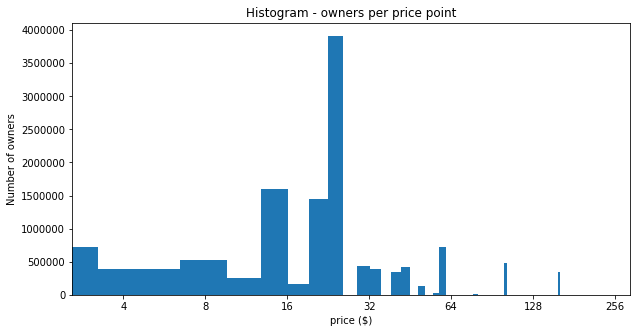

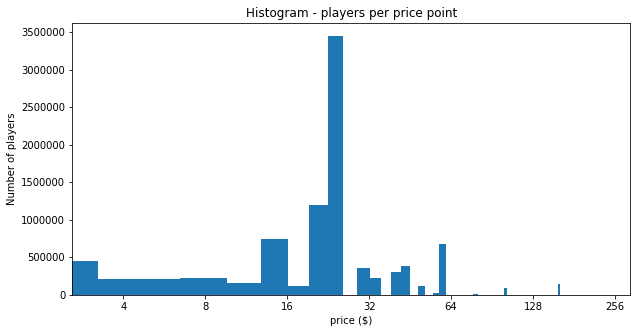

In [17]:
##calculate average owners and average players for each price
price_owners = {}
price_players = {}
for p in price:
    #get list of games with price p
    g = data[data.PriceInitial == p]
    nb_games = g.shape[0]
    #calculate avergae owners number
    total_owners = g["SteamSpyOwners"].sum()
    price_owners[p] = int(round(total_owners/nb_games))
    #caluculate avergae player base
    total_players = g["SteamSpyPlayersEstimate"].sum()
    price_players[p] = int(round(total_players/nb_games))

print(price_owners)
print()
print()
print(price_players)

#plt.plot( list(price_owners.keys()), list(price_owners.values()))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.hist( list(price_owners.keys()) ,weights= list(price_owners.values()), bins = len( list(price_owners.keys() ) )    )
plt.xscale("log")
plt.title("Histogram - owners per price point")
plt.xlabel("price ($)")
plt.ylabel("Number of owners")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.savefig("hist_owner_price.png")
plt.show()

#24-25$ os a good price for game! unless you are a huge big company

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.hist( list(price_players.keys()) ,weights= list(price_players.values()), bins = len( list(price_players.keys() ) )    )
plt.xscale("log")
plt.title("Histogram - players per price point")
plt.xlabel("price ($)")
plt.ylabel("Number of players")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.savefig("hist_player_price.png")
plt.show()

In [87]:
import scipy
#inspect price covariance and p-value

df = pd.DataFrame({"price": list(price_owners.keys()),
                    "owners": list(price_owners.values())})
print(df.cov())
r, p = scipy.stats.pearsonr(list(price_owners.keys()), list(price_owners.values()))
print()
print("Price-owners corrolation:" + str(r))
print("Price-owners p-value:" + str(p))
print()
print("-----------------------------------------------")
#use covariance here for the prices?
df = pd.DataFrame({"price": list(price_players.keys()),
                    "Players": list(price_players.values())})
print(df.cov())

# how price and player base covary? --- PCA? variance covariance and scipy.stats.pearsonr to calculate correlation coefficient
import scipy
r, p = scipy.stats.pearsonr(list(price_players.keys()),list(price_players.values()))
print()
print("Price-Players corrolation:" + str(r))
print("Price-Players p-value:" + str(p))

               price        owners
price   1.505812e+03  1.068275e+06
owners  1.068275e+06  1.645510e+11

Price-owners corrolation:0.06786521739240989
Price-owners p-value:0.5683446560280754

-----------------------------------------------
                 price       Players
price      1505.812405  5.527649e+05
Players  552764.859218  1.379235e+11

Price-Players corrolation:0.038356225473897526
Price-Players p-value:0.7473178382210254


In [88]:
import wikipedia
franchises= wikipedia.WikipediaPage("List of video game franchises").links

In [89]:
franchises_clean = []
#clean the list (get rid of (series))
for i,item in enumerate(franchises):
    if( ("List of" not in item ) and "Lists of" not in item):
        franchises_clean.append(re.sub(r' ?\(.*\)', "", item))
        #franchises[i] = re.sub(r' ?\(.*\)', "", item)


franchises_clean

["'Splosion Man",
 '.hack',
 '1080° Snowboarding',
 '1942',
 '1UP.com',
 '1Up.com',
 '3-D Ultra Pinball',
 '3D Ultra Minigolf',
 '4Gamer.net',
 '7th Dragon',
 'AOL',
 'ARMA',
 'ATV Offroad Fury',
 'A Boy and His Blob',
 'Acclaim Entertainment',
 'Ace Attorney',
 'Ace Combat',
 'Activision',
 'Adventure Gamers',
 'Adventure Island',
 'Adventures of Lolo',
 'Aero Fighters',
 'Aero the Acro-Bat',
 'Aetas',
 'After Burner',
 'Age of Empires',
 'Age of Wonders',
 'Airforce Delta',
 'Aleste',
 'Alex Kidd',
 'Alien Breed',
 'Alien Syndrome',
 'AllGame',
 'Allgame',
 'Alone in the Dark',
 'Alpine Racer',
 'Altered Beast',
 'Alundra',
 "America's Army",
 "American McGee's Alice",
 'Amnesia: The Dark Descent',
 'Amped: Freestyle Snowboarding',
 'Angry Birds',
 'Animal Crossing',
 'Animated series',
 'Anime',
 'Anno',
 'Anomaly: Warzone Earth',
 'Another Code: Two Memories',
 'Ape Escape',
 'Ar Tonelico',
 'Arc the Lad',
 'Arkanoid',
 'Armored Core',
 'Army Men',
 'Army of Two',
 'Art Academy',
 

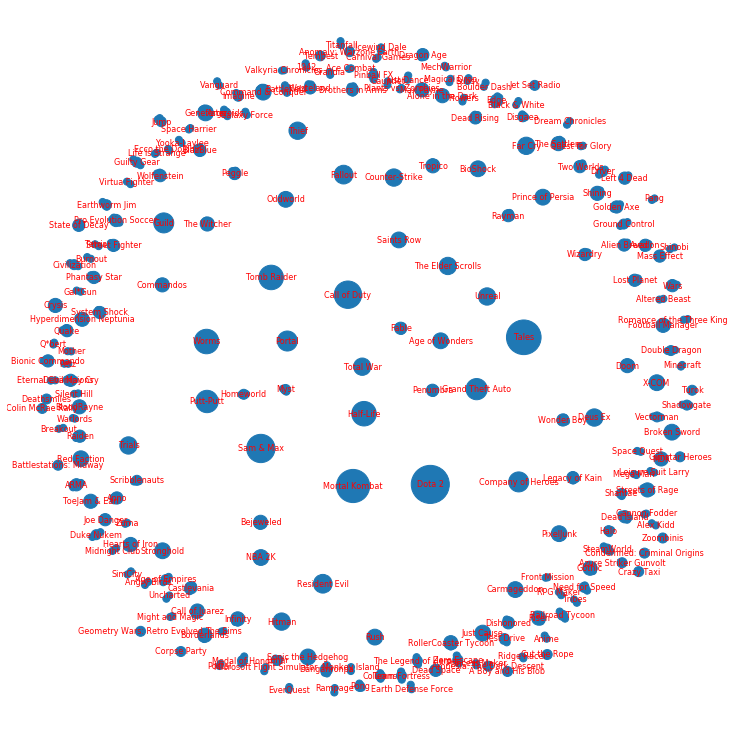

In [92]:
#Make Network of franchises and titles that belong to it
import networkx as nx
graph = nx.Graph()
labels = {}
plt.figure(figsize=(10,10))

for index, row in data.iterrows():
    g = row["ResponseName"]
    for fran in franchises_clean:
        if(len(fran)>=3):
            #if the game is part of a franchise
            if g.startswith(fran):
                #assure that it is a franchise and not part of another word
                if(len(g)>len(fran)):
                    if g[len(fran)].isalpha():
                        continue
                #print("Game "+ g +" belongs to franchise: "+ fran)
                if(graph.has_node(fran)):
                    graph.add_node(g)
                else:
                    graph.add_nodes_from([fran,g])
                    labels[fran] = fran
                graph.add_edge(g,fran)

d = dict(graph.degree)
pos=nx.spring_layout(graph, iterations=100)
#pos= nx.spiral_layout(graph)
nx.draw(graph, pos= pos,  with_labels= False, node_size=[v * 50 for v in d.values()])
nx.draw_networkx_labels( graph, pos, labels= labels, font_size=8,font_color='r')
plt.show()
#plt.savefig('Franchises.png')


In [18]:
#make Two Dic one for game--> words in game and one for game--> words in description
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))


#iterate through the data and make a dic contaning the name of the game and a cleaned word list from name/description
def get_clean_words(inputCol):
    output = {}
    for index, row in data.iterrows():
        game = row["ResponseName"]
        name_data = row[inputCol]
        # split into sentences
        tokens = word_tokenize(name_data)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        words = [w for w in words if not w in stop_words]
        # stemming of words
        stemmed = [porter.stem(word) for word in words]
        output[game] = stemmed
    return output



game_name_words = get_clean_words("ResponseName")
game_desc_word = get_clean_words("DetailedDescrip")

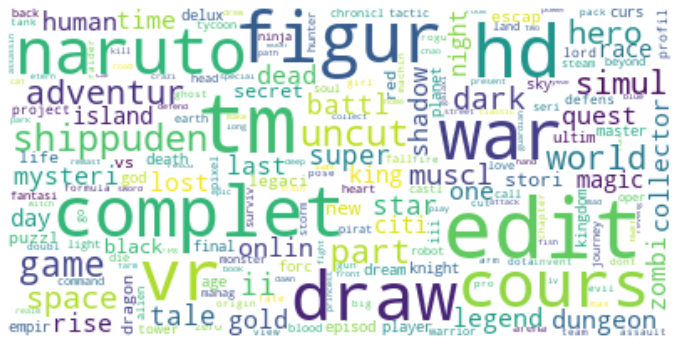

In [19]:
#name word cloud - to better see what is not reflected in the franchises
import wordcloud
all_names = [i for v in game_name_words.values() for i in v]

wc = wordcloud.WordCloud(background_color='white', max_font_size=50, collocations= False,).generate(' '.join(all_names))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

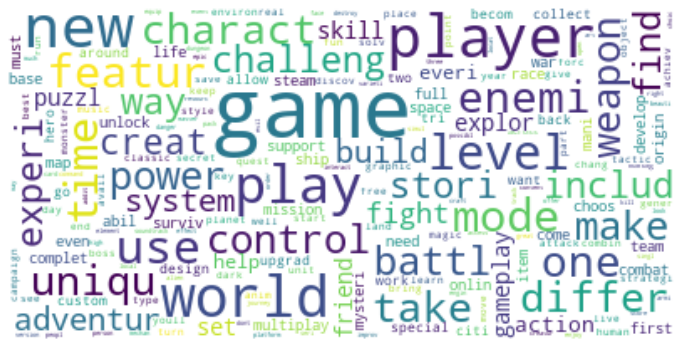

In [95]:
#description word cloud
import wordcloud
all_desc = [i for v in game_desc_word.values() for i in v]

wc = wordcloud.WordCloud(background_color='white', max_font_size=50, collocations= False,).generate(' '.join(all_desc))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
# sentiment analysis on name or ddescription ----> metascore? how it effects it
from afinn import Afinn
afinn= Afinn()

#creata a dic: key--> game name --> value = (sentiment score, metascore)
game_sentimentscore_metascore = {}

for name in game_name_words.keys():
    row = data.loc[data["ResponseName"] == name]
    metascore = list(row['Metacritic'])[0]
    if metascore == 0:
        continue
    sentiment_score = afinn.score(' '.join(game_name_words[name]))
    game_sentimentscore_metascore[name] = (sentiment_score, metascore)


[(-6.0, 64), (-5.0, 77), (-4.0, 69), (-3.0, 72), (-2.0, 73), (-1.0, 73), (0.0, 72), (1.0, 69), (2.0, 76), (3.0, 76), (4.0, 74), (5.0, 76), (8.0, 78)]


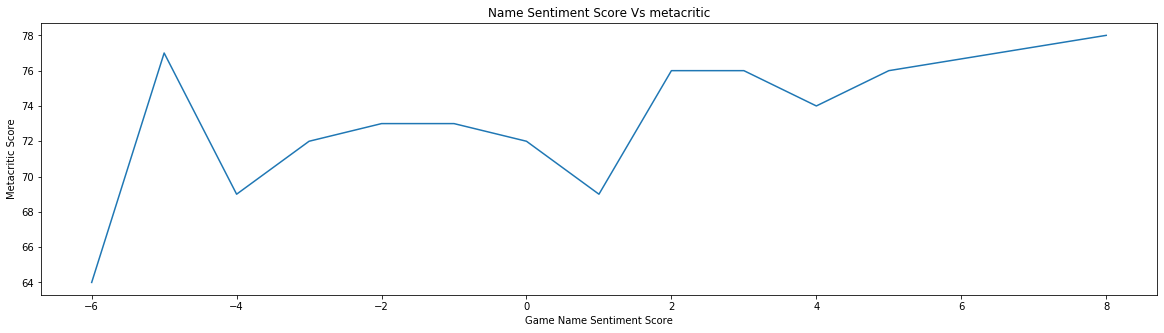

In [21]:
#plot sentiment score vs critic ------ GAME NAME
from statistics import mean 

sentimentscore = [i[0] for i in game_sentimentscore_metascore.values()]
metascore = [i[1] for i in game_sentimentscore_metascore.values()]

#calculate avg metacritic for every sentiment score
avg_critic_score = {}
for i, s_score in enumerate(sentimentscore):
    if(s_score not in avg_critic_score):
        avg_critic_score[s_score] = []
    avg_critic_score[s_score].append(metascore[i])

for key in avg_critic_score.keys():
    avg_critic_score[key]=  int(round(mean(avg_critic_score[key])))

print(sorted(avg_critic_score.items()))

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

plt.plot( [score[0] for score in sorted(avg_critic_score.items())],   [score[1] for score in sorted(avg_critic_score.items())]   )
plt.title("Name Sentiment Score Vs metacritic")
plt.xlabel("Game Name Sentiment Score")
plt.ylabel("Metacritic Score")
plt.savefig("sentiment_metacritic.png")
plt.show()

In [23]:
## REPEAT FOR DESCRIPTION

#game description sentiment score vs meta critic
game_disc_sentimentscore_metascore = {}

for name in game_name_words.keys():
    row = data.loc[data["ResponseName"] == name]
    metascore = list(row['Metacritic'])[0]
    if metascore == 0:
        continue
    sentiment_score = afinn.score(' '.join(game_desc_word[name]))
    game_disc_sentimentscore_metascore[name] = (sentiment_score, metascore)


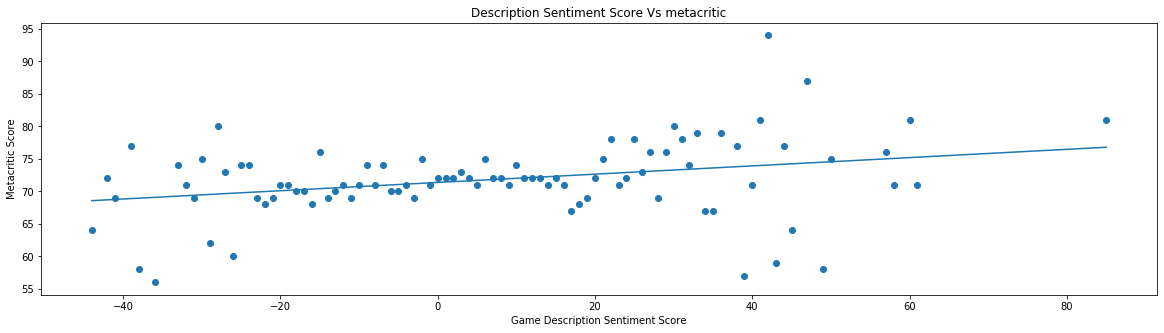

In [24]:
sentimentscore = [i[0] for i in game_disc_sentimentscore_metascore.values()]
metascore = [i[1] for i in game_disc_sentimentscore_metascore.values()]

#calculate avg metacritic for every sentiment score
avg_critic_score = {}
for i, s_score in enumerate(sentimentscore):
    if(s_score not in avg_critic_score):
        avg_critic_score[s_score] = []
    avg_critic_score[s_score].append(metascore[i])

for key in avg_critic_score.keys():
    avg_critic_score[key]=  int(round(mean(avg_critic_score[key])))

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

x = [score[0] for score in sorted(avg_critic_score.items())]
y =  [score[1] for score in sorted(avg_critic_score.items())]

plt.scatter( x,   y  )
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.title("Description Sentiment Score Vs metacritic")
plt.xlabel("Game Description Sentiment Score")
plt.ylabel("Metacritic Score")
plt.savefig("sentiment_metacritic_descr.png")
plt.show()

In [27]:
# switching to video_game dataset !!

from pathlib import Path
import os

currdir = Path(os.getcwd())
datadir = currdir / "Data"
file = datadir / "video_game.csv"
vg_data = pd.read_csv(file)
vg_data.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_players,EU_players,JP_players,Other_players,Global_players,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


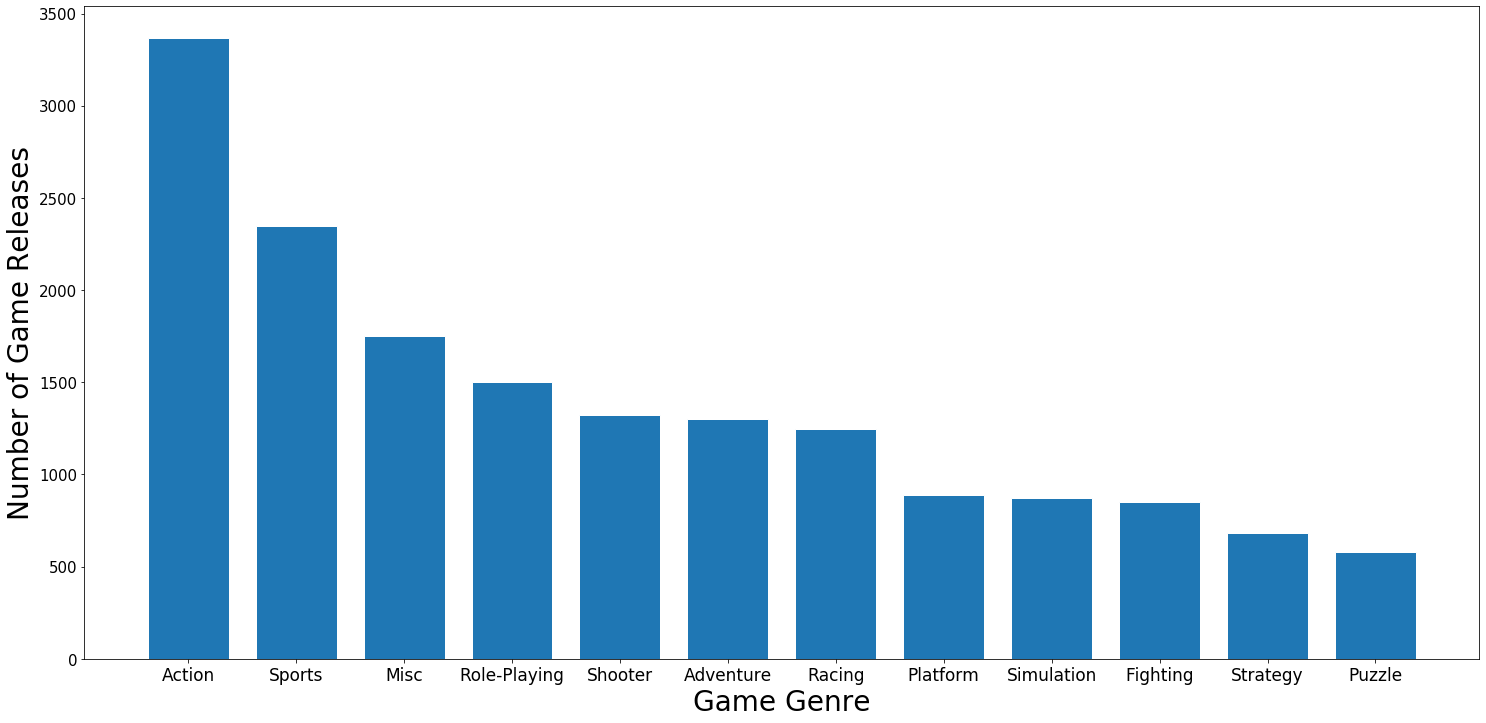

In [74]:

#game dist by genre 
genre_dist = {}
for index, row in vg_data.iterrows():
    g = row["Genre"]
    if not pd.isnull(g):
        if g not in genre_dist:
            genre_dist[g] = 0
        genre_dist[g] +=1

# make into list then sort to look pretty
genre_dist = list(genre_dist.items())
genre_dist = sorted(genre_dist, key=lambda x: x[1], reverse=True)

# y ticks
genres = [y[0] for y in genre_dist]

plt.figure(figsize=(25,12))
bar_width = 0.75
bars = [v[1] for v in genre_dist]
r1 = np.arange(len(bars))
plt.bar(r1, bars, width=bar_width, edgecolor='white', label='NA players')
plt.xticks([r for r in range(len(bars))], genres, fontsize=17)
plt.yticks(fontsize=15)
plt.title("")
plt.xlabel("Game Genre", fontsize=28)
plt.ylabel("Number of Game Releases", fontsize =28)
plt.savefig("genres_numgames.png")
plt.show()

In [28]:
# differences in attributes per region

# params: the dataset, a column of the ds. returns 3 dicts, one for each region
def some_attr_per_region(dataframe, attribute):
    na = {}
    eu = {}
    jp = {}
    for i, row in dataframe.iterrows():
        g = row[attribute]
        if not pd.isnull(g):
            if g not in na:
                na[g] = 0
            na[g] += row["NA_players"]
            if g not in eu:
                eu[g] = 0
            eu[g] += row["EU_players"]
            if g not in jp:
                jp[g] = 0
            jp[g] += row["JP_players"]
    return na, eu, jp

na_by_genre, eu_by_genre, jp_by_genre = some_attr_per_region(vg_data, "Genre")



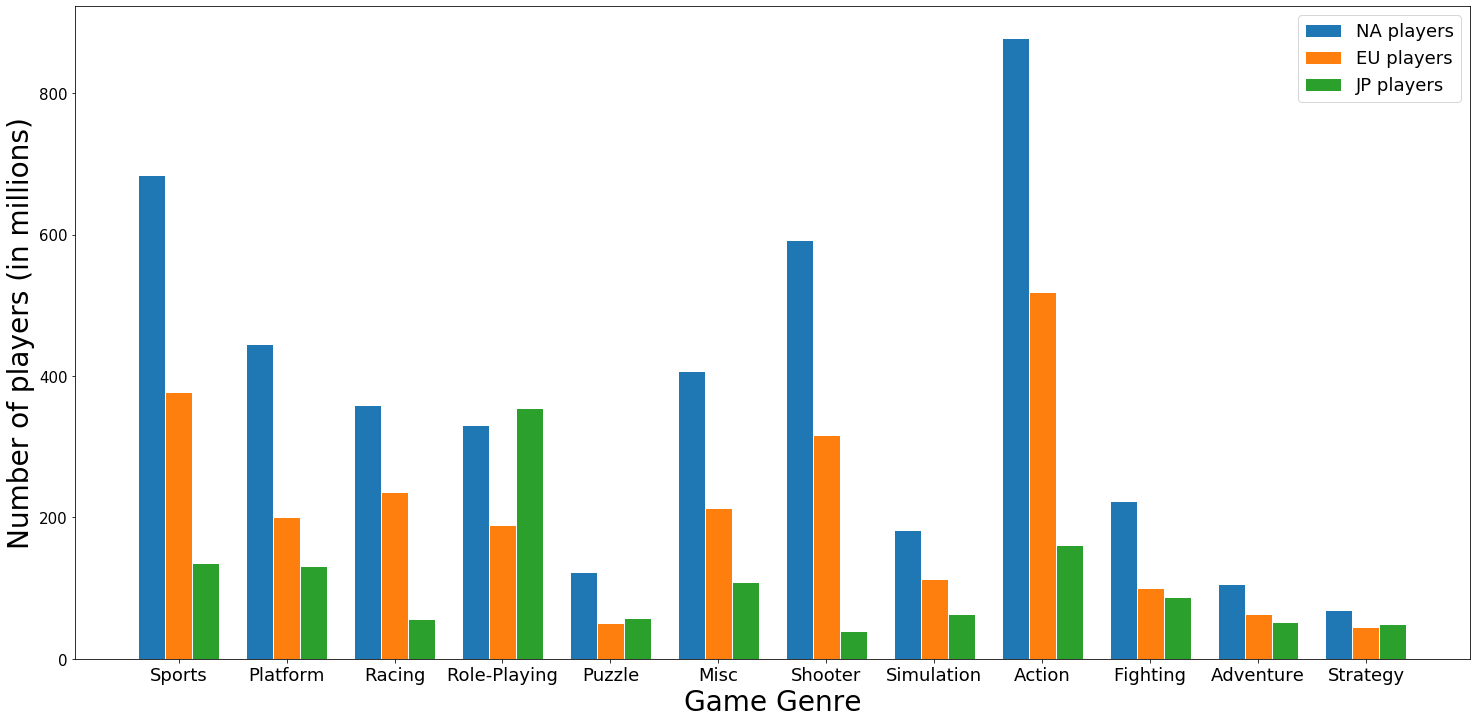

In [62]:
plt.figure(figsize=(25, 12))
bar_width = 0.25
na_bars = na_by_genre.values()
eu_bars = eu_by_genre.values()
jp_bars = jp_by_genre.values()
# bar positions
r1 = np.arange(len(na_bars))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# plot
plt.bar(r1, na_bars, width=bar_width, edgecolor='white', label='NA players')
plt.bar(r2, eu_bars, width=bar_width, edgecolor='white', label='EU players')
plt.bar(r3, jp_bars, width=bar_width, edgecolor='white', label='JP players')
plt.xlabel('Game Genre', fontsize=28)
plt.ylabel("Number of players (in millions)", fontsize=28)
plt.xticks([r + bar_width for r in range(len(na_bars))], na_by_genre.keys(), fontsize=18)
plt.yticks(fontsize=15)

plt.legend(prop={'size': 18})
plt.savefig("regions_genre.png")
plt.show()


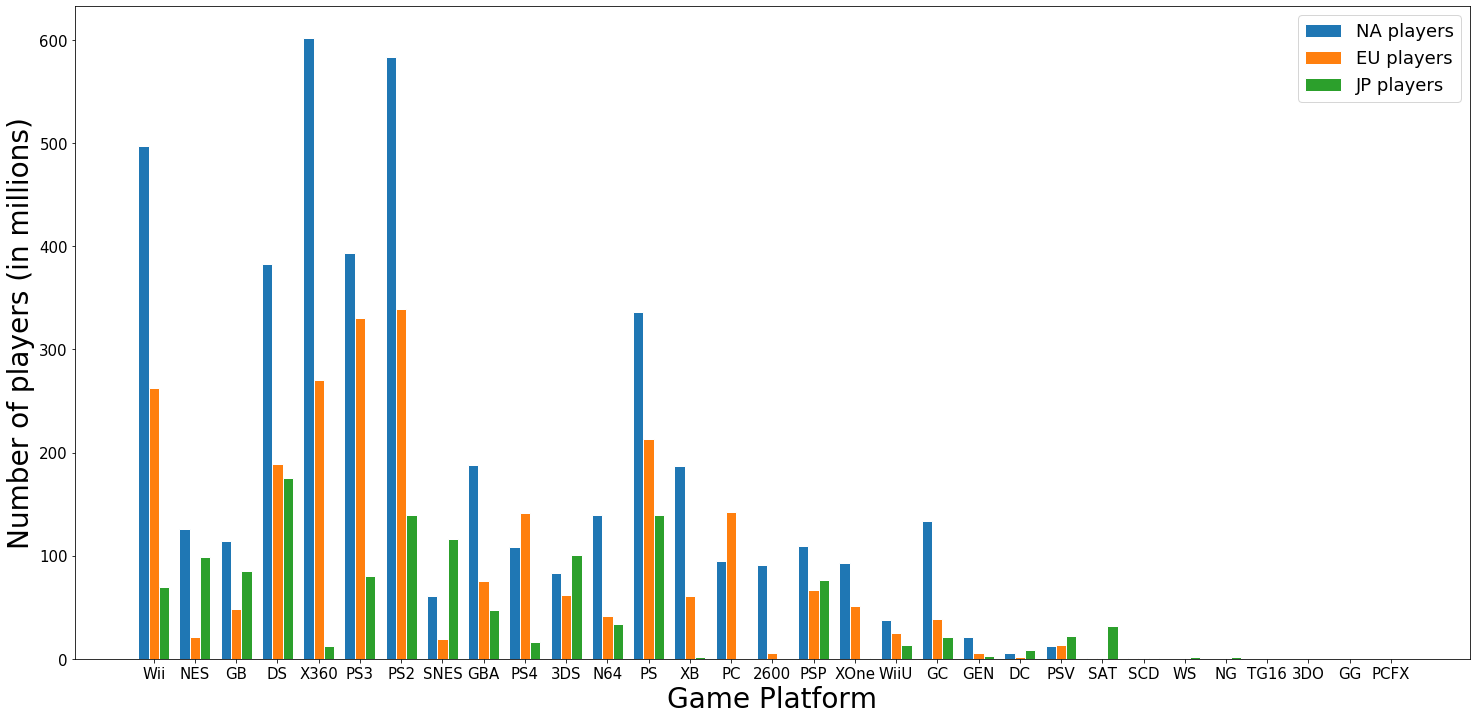

In [61]:
# regions vs platform

na_by_platform, eu_by_platform, jp_by_platform = some_attr_per_region(vg_data, "Platform")

plt.figure(figsize=(25, 12))
bar_width = 0.25
na_bars = na_by_platform.values()
eu_bars = eu_by_platform.values()
jp_bars = jp_by_platform.values()
# bar positions
r1 = np.arange(len(na_bars))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# plot
plt.bar(r1, na_bars, width=bar_width, edgecolor='white', label='NA players')
plt.bar(r2, eu_bars, width=bar_width, edgecolor='white', label='EU players')
plt.bar(r3, jp_bars, width=bar_width, edgecolor='white', label='JP players')
plt.xlabel('Game Platform', fontsize=28)
plt.ylabel("Number of players (in millions)", fontsize=28)
plt.xticks([r + bar_width for r in range(len(na_bars))], na_by_platform.keys(), fontsize=15)
plt.yticks(fontsize=15)

plt.legend(prop={'size': 18})
plt.savefig("regions_platform.png")
plt.show()

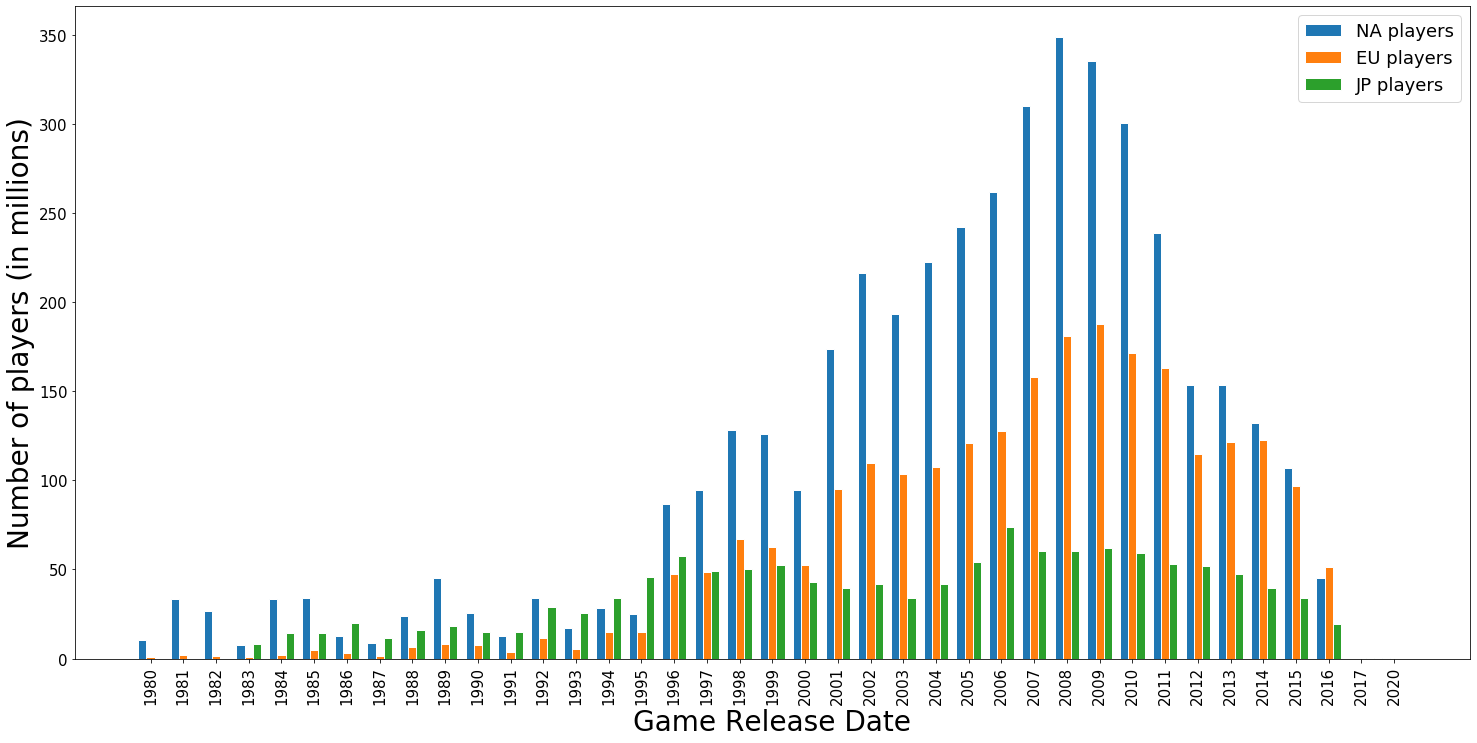

In [71]:
# regions vs game release date

na_by_release, eu_by_release, jp_by_release = some_attr_per_region(vg_data, "Year_of_Release")

# sort so that bar chart can be sorted by asceding years
na_by_release = list(na_by_release.items())
na_by_release.sort()

eu_by_release = list(eu_by_release.items())
eu_by_release.sort()

jp_by_release = list(jp_by_release.items())
jp_by_release.sort()

years = [y[0] for y in na_by_release]
years = list(map(int, years))

plt.figure(figsize=(25, 12))
bar_width = 0.25
na_bars = [v[1] for v in na_by_release]
eu_bars = [v[1] for v in eu_by_release]
jp_bars = [v[1] for v in jp_by_release]

# bar positions
r1 = np.arange(len(na_bars))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# plot
plt.bar(r1, na_bars, width=bar_width, edgecolor='white', label='NA players')
plt.bar(r2, eu_bars, width=bar_width, edgecolor='white', label='EU players')
plt.bar(r3, jp_bars, width=bar_width, edgecolor='white', label='JP players')
plt.xlabel('Game Release Date', fontsize=28)
plt.ylabel("Number of players (in millions)", fontsize=28)
plt.xticks([r + bar_width for r in range(len(na_bars))], years, fontsize=15, rotation='vertical')
plt.yticks(fontsize=15)

plt.legend(prop={'size': 18})
plt.savefig("regions_release.png")
plt.show()

In [4]:
#build a model that predicts sales based on name


#### DATA PREPROCESSING --- making a vocab list of the words in game names. --- We are Using number of copies sold as a measure of success


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

def get_stem_words (name_data):
    # split into sentences
    tokens = word_tokenize(name_data)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    words = [w for w in words if not w in stop_words]
    # stemming of words
    stemmed = [porter.stem(word) for word in words]
    return stemmed

def build_vocab_list(data):
    vocab = []
    for index, row in data.iterrows():
        name_data = row["Name"]
        stemmed = get_stem_words(name_data)
        for elem in stemmed:
            if elem not in vocab:
                vocab.append(elem)
    return sorted(vocab)



#vg sales metacritic
data = pd.read_csv("Data\\vgsales-12-4-2019-short.csv")
#remove duplicates
data = data.drop_duplicates(subset ="Name", 
                     keep = 'first',) 
#keep data that has sales data -- #stop at 19862 index
data = data[data['Rank']<=19862]
#get rid fo wii sport because it is extreme

data = data[data['Rank']>1]
genres = list(np.unique(data.Genre))
platforms = list(np.unique(data.Platform))
vocab = build_vocab_list(data)
#max and min for normalizing output
max_y = 40.24
min_y = 0.01

#print(data)
#print(genres)
#print(platforms)
#make a vocab list

#we have 13840 games left in data set


In [5]:
import math
x = np.zeros((len(data), len(vocab)), dtype=int)
y = np.zeros(len(data), dtype=int)

i=0

## convert the name of each game into a matrix that uses the vocab list, if words exists mark index as 1, 0 otherwise

for index, row in data.iterrows():
    name_data = data.loc[index, "Name"]
    stemmed = get_stem_words(name_data)
    #make the words in the name into 1 value of the input
    for stem in stemmed:
        x[i][vocab.index(stem)] = 1
    #construct output
    if  math.isnan(float(data.loc[index, "Total_Shipped"])):
        out = float(data.loc[index, "Global_Sales"])
    else:
        out = float(data.loc[index, "Total_Shipped"])
    #normalize
    out = (out - min_y)/(max_y - min_y)
    y[i] = int(out *100)
    i += 1


In [6]:
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [7]:
y_train = to_categorical(y, num_classes=101)
print(y)
print(y_train)

[100  92  90 ...   0   0   0]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [8]:
model = tf.keras.models.Sequential()
model.add(Dense(32,  input_shape=(9082,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(101, activation='softmax'))

model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['acc'])


model.fit(x,y_train, epochs=15, batch_size=16, shuffle=True, verbose=2 )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 13839 samples
Epoch 1/15
13839/13839 - 18s - loss: 1.1826 - acc: 0.7214
Epoch 2/15
13839/13839 - 17s - loss: 0.9577 - acc: 0.7221
Epoch 3/15
13839/13839 - 10s - loss: 0.8479 - acc: 0.7338
Epoch 4/15
13839/13839 - 20s - loss: 0.7601 - acc: 0.7503
Epoch 5/15
13839/13839 - 13s - loss: 0.6961 - acc: 0.7679
Epoch 6/15
13839/13839 - 18s - loss: 0.6350 - acc: 0.7884
Epoch 7/15
13839/13839 - 17s - loss: 0.5887 - acc: 0.8003
Epoch 8/15
13839/13839 - 18s - loss: 0.5445 - acc: 0.8147
Epoch 9/15
13839/13839 - 16s - loss: 0.5152 - acc: 0.8230
Epoch 10/15
13839/13839 - 25s - loss: 0.4880 - acc: 0.8319
Epoch 11/15
13839/13839 - 22s - loss: 0.4707 - acc: 0.8379
Epoch 12/15
13839/13839 - 28s - loss: 0.4504 - acc: 0.8446
Epoch 13/15
13839/13839 - 26s - loss: 0.4427 - acc: 0.8465
Epoch 14/15
13839/13839 - 22s - loss: 0.4244 - acc: 0.8515
Epoch 15/15
13839/13839 - 28s - loss: 0.4050 - acc: 0.8557


In [9]:
ev = model.evaluate(x,y_train, verbose = 2)

13839/13839 - 8s - loss: 0.3892 - acc: 0.8605


In [10]:
print(ev)

[0.3892251844437751, 0.8605391]


In [15]:
name= "Dark Souls"
stemmed = get_stem_words(name)
print(stemmed)
input_test = np.zeros((1, len(vocab)), dtype=int)
for stem in stemmed:
        input_test[0][vocab.index(stem)] = 1

pred = model.predict(input_test)
result_index = np.argmax(pred[0])
# ???
sales = ((result_index / 100) * (40.24-0.01)) + 0.01
print( 'expected number of sales:' + str(sales) ) #million?

['dark', 'soul']
expected number of sales:2.0215
